# Handwritten classification using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset

> The training set contains 60k images and the testing set contains 10k images.  
> The training input vector is of the dimension [60000 X 28 X 28].  
> The training output vector is of the dimension [60000 X 1].  
> Each individual input vector is of the dimension [28 X 28].  
> Each individual output vector is of the dimension [1].  


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalize the pixel values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# Define the ANN model architecture

# classification - sigmoid or tanh
# regression - linear?
# multiclassification - use softmax activation

model = keras.Sequential(
    [
        keras.layers.Flatten(
            input_shape=(28, 28)
        ),  # Convert the 28x28 image into a 1D array
        keras.layers.Dense(
            128, activation="relu"
        ),  # Hidden layer with 128 units and ReLU activation
        keras.layers.Dense(
            10, activation="softmax"
        ),  # Output layer with 10 units and softmax activation
    ]
)

In [5]:
# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model on the training set for 5 epochs
# You can either specify a seperate validation set or split the training data into validation set
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531 - accuracy: 0.9285 - val_loss: 0.1358 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1132 - accuracy: 0.9664 - val_loss: 0.0936 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0786 - accuracy: 0.9765 - val_loss: 0.0879 - val_accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0761 - val_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0817 - val_accuracy: 0.9744


In [6]:
# Predict the labels of the test set
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 586us/step


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", acc)

Confusion Matrix:
[[ 970    0    2    3    0    2    0    1    2    0]
 [   0 1128    3    1    0    1    1    0    1    0]
 [   4    2 1009    4    4    0    1    5    3    0]
 [   1    0    4  997    0    2    0    5    1    0]
 [   3    0    3    1  960    0    0    4    0   11]
 [   3    0    0    8    1  874    2    1    2    1]
 [  11    3    2    3    8   10  919    0    2    0]
 [   2    4   11    3    0    0    0 1003    1    4]
 [   4    2   10   20    5    8    1    6  916    2]
 [   4    3    3   10   11    2    0    6    2  968]]
Accuracy: 0.9744


# Plotting

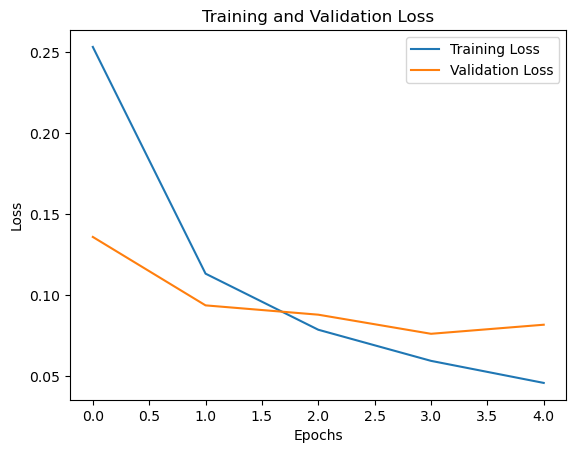

In [8]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

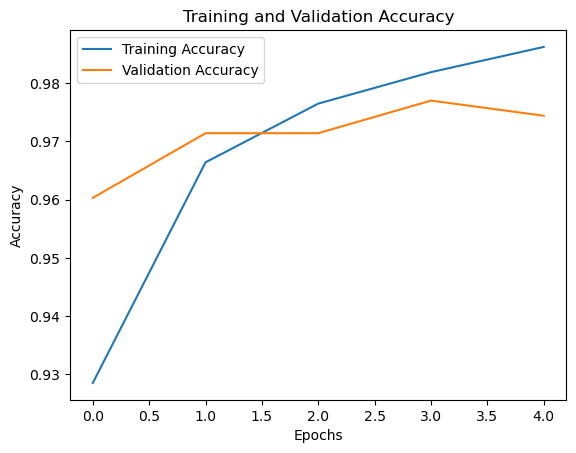

In [9]:
# Plot the training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()